# Playstore Live Project 2023

## Data Cleaning and Exploratory Data Analysis

### Import Modules and Data Review

#### Loading Modules

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import missingno as msno
from skimpy import clean_columns, skim

%matplotlib inline

# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

# Figure and display options
plt.rcParams['figure.figsize'] = (10,6)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_style('whitegrid')

# !pip install termcolor
import colorama
from colorama import Fore, Back, Style  # makes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

#### 'Apps' Data

In [2]:
# loading data from 'apps' file
df1 = pd.read_csv('playstore_apps.csv', index_col="App")

df1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159.000,19M,10000.000,Free,0.000,Everyone,Art & Design,07-01-2018,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.900,967.000,14M,500000.000,Free,0.000,Everyone,Art & Design;Pretend Play,15-01-2018,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700,87510.000,8.7M,5000000.000,Free,0.000,Everyone,Art & Design,01-08-2018,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.500,215644.000,25M,50000000.000,Free,0.000,Teen,Art & Design,08-06-2018,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300,967.000,2.8M,100000.000,Free,0.000,Everyone,Art & Design;Creativity,20-06-2018,1.1,4.4 and up


In [3]:
df1.sample(3).T

App,Twitter,"9GAG: Funny Gifs, Pics, Memes & Videos for IGTV",DG Xplained
Category,NEWS_AND_MAGAZINES,FAMILY,HEALTH_AND_FITNESS
Rating,4.300,4.600,NaN
Reviews,11657972.000,1450632.000,1.000
Size,Varies with device,Varies with device,12M
Installs,500000000.000,10000000.000,100.000
Type,Free,Free,Free
Price,0.000,0.000,0.000
Content Rating,Mature 17+,Teen,Everyone
Genres,News & Magazines,Entertainment,Health & Fitness
Last Updated,30-07-2018,03-08-2018,02-05-2018


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10840 non-null  float64
 3   Size            10841 non-null  object 
 4   Installs        10840 non-null  float64
 5   Type            10840 non-null  object 
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.1+ MB


#### Handling Duplicates

In [5]:
# checking for duplicates
df1.duplicated().value_counts()

False    10349
True       492
dtype: int64

In [8]:
# dropping all duplicates
df1.drop_duplicates(keep=False, inplace=True)

In [12]:
# shape of dataframe after removing duplicates
df1.shape

(9930, 12)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9930 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9930 non-null   object 
 1   Rating          8487 non-null   float64
 2   Reviews         9929 non-null   float64
 3   Size            9930 non-null   object 
 4   Installs        9929 non-null   float64
 5   Type            9929 non-null   object 
 6   Price           9929 non-null   float64
 7   Content Rating  9929 non-null   object 
 8   Genres          9930 non-null   object 
 9   Last Updated    9929 non-null   object 
 10  Current Ver     9922 non-null   object 
 11  Android Ver     9927 non-null   object 
dtypes: float64(4), object(8)
memory usage: 1008.5+ KB


#### Handling Irrelevant Values

In [13]:
df1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
#'category' column 
df1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

> '1.9' is irrelevant

In [15]:
df1[df1["Category"] == '1.9']

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000,NaN,"1,000+",NaN,0,NaN,NaN,"February 11, 2018",NaN,4.0 and up,NaN


> Single entry, good to drop

In [17]:
# locating index
df1[df1["Category"] == '1.9'].index[0]

'Life Made WI-Fi Touchscreen Photo Frame'

In [18]:
df1.drop(df1[df1["Category"] == '1.9'].index[0], inplace=True)

In [19]:
# checking if the irrelevant values are removed
df1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [20]:
df1.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 2.5, 1. , 1.9,
       2.9, 2.8, 2.3, 2.2, 1.7, 2. , 1.8, 2.7, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

> No irrelevant values

In [22]:
df1.Reviews.unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

> No irrelevant values

In [32]:
df1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [33]:
df1.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '8.3M', '4.3M', '4.7M',
       '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k',
       '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M',
       '1.4M

In [80]:
df1.Size.sample(3)

App
HOW TO WRITE A CV                20M
Event Manager - AllEvents.in    5.1M
E.U. Trademark Search Tool      3.1M
Name: Size, dtype: object

> No irrelevant values

In [81]:
df1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [82]:
df1.Installs.unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [83]:
df1.Installs.sample(3)

App
Wallpapers HD    10000000.000
Marítimo EC            10.000
Hay Day         100000000.000
Name: Installs, dtype: float64

> No irrelevant values

In [84]:
df1.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

> No irrelevant values

In [85]:
df1.Price.unique()

array([  0.  ,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,   4.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   1.  ,   2.49,  10.99,
         1.5 ,  14.99,  15.99,  74.99,  39.99,   3.95,  29.99,   4.49,
         1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,  19.99,   1.59,
         6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,  18.99,
       389.99,  19.9 ,   8.49,   1.75,  11.99,  14.  ,   4.85,  46.99,
         5.49, 109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,
         3.9 ,   4.59,  15.46,  10.  ,   3.04,  12.99,   4.29,   2.6 ,
         3.28,   4.6 ,  28.99,   2.95,   2.9 ,   1.97,  24.99, 200.  ,
        89.99,   2.56,  30.99,   3.61, 394.99,   1.26,  16.99,   1.2 ,
         1.04])

In [86]:
df1.Price.dtype

dtype('float64')

In [91]:
df1.Price.sample(3)

App
Pick Your Part Garage   0.000
Photo Effects Pro       0.000
Word Search             0.000
Name: Price, dtype: float64

> No irrelevant values

In [92]:
df1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [93]:
df1["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

> No irrelevant values

In [94]:
df1.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Adventure', 'Board', 'Trivia',
       'Simulation', 'Role 

> No irrelevant values

In [95]:
df1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [96]:
df1["Last Updated"].unique()

array(['07-01-2018', '15-01-2018', '01-08-2018', ..., '20-01-2014',
       '16-02-2014', '23-03-2014'], dtype=object)

In [103]:
df1["Last Updated"].sample(3)

App
Pocket RxTx Free               04-03-2018
AC Remote Control Simulator    04-12-2017
Soviet Military Maps Free      01-08-2018
Name: Last Updated, dtype: object

> No irrelevant values

In [104]:
df1["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [110]:
df1["Current Ver"].sample(3)

App
Flight & Hotel Booking App - ixigo    4.0.9.1
GUYZ - Gay Chat & Gay Dating          1.3.6.4
Miller's Bar B-Q                      2.6.003
Name: Current Ver, dtype: object

> No irrelevant values

In [111]:
df1["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

> No irrelevant values

#### 'Reviews' Data

In [112]:
# loading data from 'reviews' file
df2 = pd.read_csv('playstore_reviews.csv', index_col="App")

df2.head()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.000,0.533
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250,0.288
10 Best Foods for You,NaN,NaN,NaN,NaN
10 Best Foods for You,Works great especially going grocery store,Positive,0.400,0.875
10 Best Foods for You,Best idea us,Positive,1.000,0.300


In [113]:
df2.sample(3).T

App,Hill Climb Racing,Comptia A+ 220-901 & 220-902,CompTIA A+ Pocket Prep
Translated_Review,NaN,Good,NaN
Sentiment,NaN,Positive,NaN
Sentiment_Polarity,NaN,0.700,NaN
Sentiment_Subjectivity,NaN,0.600,NaN


In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64295 entries, 10 Best Foods for You to Houzz Interior Design Ideas
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Translated_Review       37427 non-null  object 
 1   Sentiment               37432 non-null  object 
 2   Sentiment_Polarity      37432 non-null  float64
 3   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.5+ MB


#### Handling Duplicates

In [115]:
# checking for duplicates
df2.duplicated().value_counts()

True     36299
False    27996
dtype: int64

In [116]:
# dropping all duplicates
df2.drop_duplicates(keep=False, inplace=True)

In [117]:
# shape of dataframe after removing duplicates
df2.shape

(22593, 4)

In [118]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22593 entries, 104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室 to Housing-Real Estate & Property
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Translated_Review       22593 non-null  object 
 1   Sentiment               22593 non-null  object 
 2   Sentiment_Polarity      22593 non-null  float64
 3   Sentiment_Subjectivity  22593 non-null  float64
dtypes: float64(2), object(2)
memory usage: 882.5+ KB


#### Handling Irrelevant Values

In [119]:
df2.columns

Index(['Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [120]:
df2.Translated_Review.unique()

array(['Almost mobile phone',
       'Very effective, efficient convenient find available jobs. Keep good work power 104 Job Search.',
       'Easy intuitive', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [127]:
df2.Translated_Review.sample(3).T

App
Color by Number - Draw Sandbox Pixel Art                    I like fun addictive
Doodle Jump                                                          With KRIANL
A+ Mobile                                   Can laggy times generally works good
Name: Translated_Review, dtype: object

In [138]:
df2.Translated_Review.describe().T

count                   22593
unique                  22593
top       Almost mobile phone
freq                        1
Name: Translated_Review, dtype: object

> No irrelevant values

In [128]:
df2.Sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [139]:
df2.Sentiment.describe()

count        22593
unique           3
top       Positive
freq         14142
Name: Sentiment, dtype: object

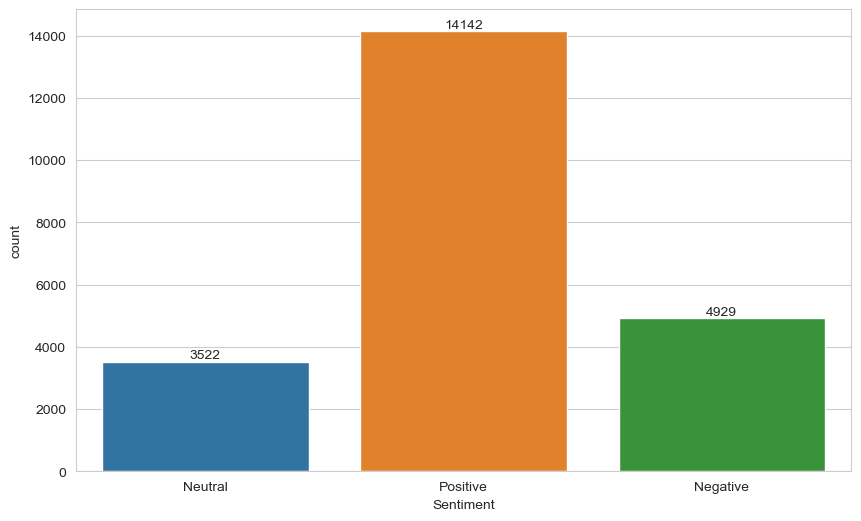

In [143]:
ax = sns.countplot(df2.Sentiment);
for p in ax.containers:
    ax.bar_label(p)

> No irrelevant values

In [129]:
df2.Sentiment_Polarity.unique()

array([ 0.        ,  0.62666667,  0.43333333, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [133]:
df2.Sentiment_Polarity.sample(3)

App
BIG Launcher                                       0.000
Dungeon Hunter Champions: Epic Online Action RPG   0.137
Bike Computer - GPS Cycling Tracker                0.000
Name: Sentiment_Polarity, dtype: float64

In [134]:
df2.Sentiment_Polarity.dtype

dtype('float64')

In [135]:
df2.Sentiment_Polarity.describe()

count   22593.000
mean        0.174
std         0.347
min        -1.000
25%         0.000
50%         0.144
75%         0.400
max         1.000
Name: Sentiment_Polarity, dtype: float64

> No irrelevant values

In [136]:
df2.Sentiment_Subjectivity.unique()

array([0.        , 0.66666667, 0.83333333, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

In [137]:
df2.Sentiment_Subjectivity.describe()

count   22593.000
mean        0.481
std         0.265
min         0.000
25%         0.333
50%         0.500
75%         0.650
max         1.000
Name: Sentiment_Subjectivity, dtype: float64

### Handling Missing Values

In [145]:
# 'Apps' data
df1.isnull().sum()

Category             0
Rating            1443
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [147]:
df1.isnull().sum() / df1.shape[0] * 100

Category          0.000
Rating           14.533
Reviews           0.000
Size              0.000
Installs          0.000
Type              0.010
Price             0.000
Content Rating    0.000
Genres            0.000
Last Updated      0.000
Current Ver       0.081
Android Ver       0.020
dtype: float64

> `Rating` column has `14%` missing values. Some other columns have minimal missing values.

In [148]:
# 'Reviews' data
df2.isnull().sum()

Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [149]:
df2.isnull().sum().any()

False

> No null values

### Exporting cleaned dataset

In [150]:
# 'App' data
df1.to_csv("cleaned_apps.csv")

In [151]:
# 'Reviews' data
df2.to_csv("cleaned_reviews.csv")